In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data=pd.read_csv('C:/Users/dipta/Desktop/Telco Churn Analysis/Customer Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#PREPROCESSING

In [7]:

print('Number of (Rows,Columns):',data.shape)

Number of (Rows,Columns): (7043, 21)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#we have blank spaces in "total charges" column and we need to replace it with 0

data['TotalCharges']=data['TotalCharges'].replace(' ',0)
#converting the data type to totalcharges from object to float
data['TotalCharges']=data['TotalCharges'].astype('float')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#checkign if any data is duplicated
data['customerID'].duplicated().sum()

np.int64(0)

In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#checking all the distinct values in payment method
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [21]:
#converting 0,1 in senior citizen to yes or no

def convert(val):
    if val==0:
        return "No"
    else :
        return "Yes"
    
data['SeniorCitizen']=data['SeniorCitizen'].apply(convert)

#ANALYSIS

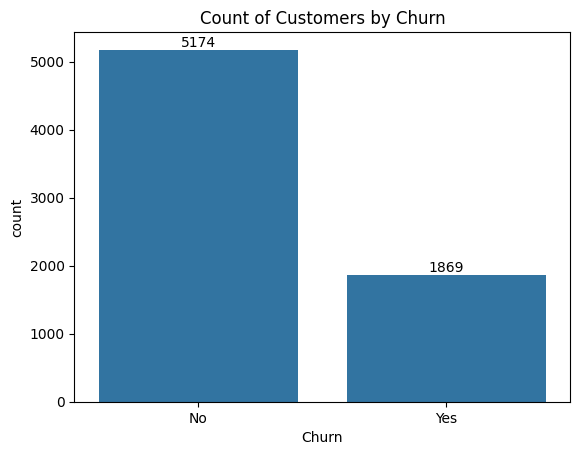

In [25]:
churnplot = sns.countplot(x=data['Churn'])

churnplot.bar_label(churnplot.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

## We can conclude that 26.5% of the customers have churned out


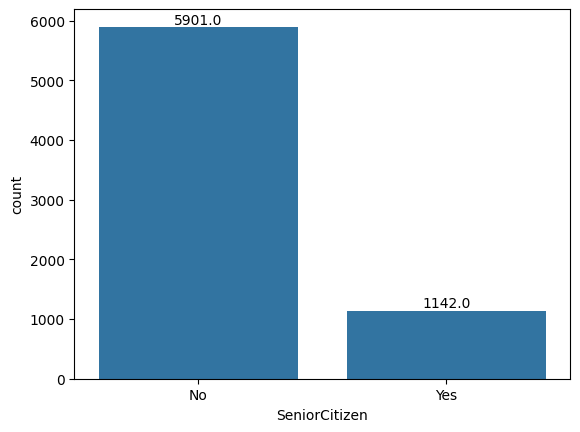

In [ ]:
plot = sns.countplot(x=data['SeniorCitizen'])

for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), 
                  ha='center', va='bottom')

# this shows us the number of senior citizen customers 

## this shows us the number of senior citizen customers

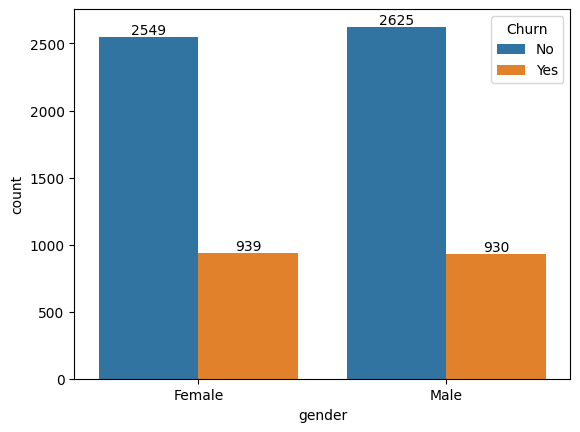

In [ ]:
genplot=sns.countplot(x=data['gender'],hue=data['Churn'])
for container in genplot.containers:
    genplot.bar_label(container)
#shows the number of female/male customers that have churned out of the company

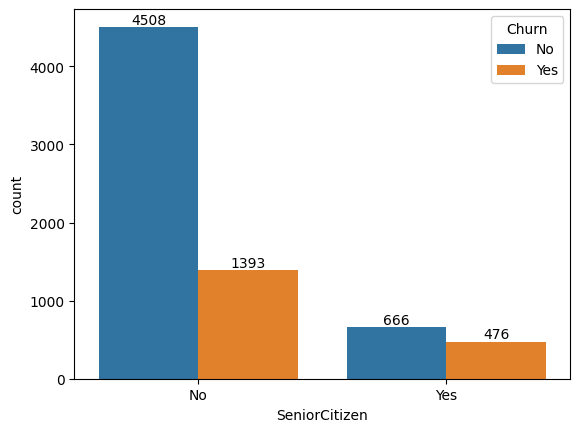

In [ ]:
scplot=sns.countplot(x=data['SeniorCitizen'],hue=data['Churn'])
for container in scplot.containers:
    scplot.bar_label(container)

#shows the number of senior citizen/non senior citizen customers that have churned out of the company

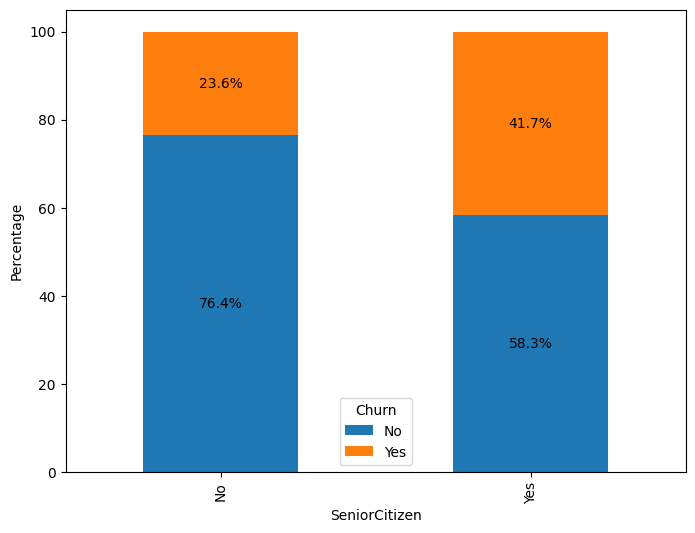

In [ ]:
crosstab = pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index') * 100
crosstab = crosstab.round(1)

ax = crosstab.plot(kind='bar', stacked=True, figsize=(8,6))

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.ylabel('Percentage')
plt.show()

#shows the percent of senior citizen/non senior citizen customers that have churned out of the company

<Axes: xlabel='tenure', ylabel='Count'>

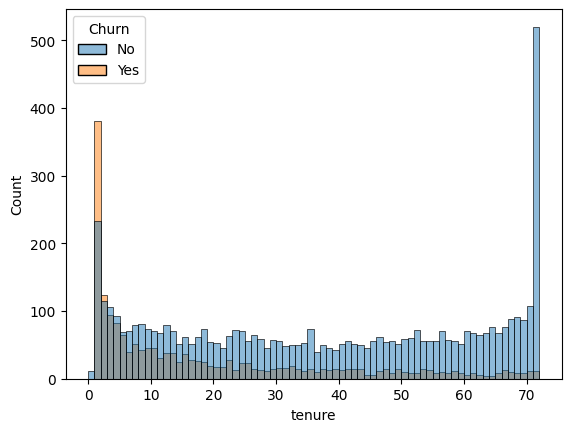

In [ ]:
sns.histplot(x=data['tenure'],bins=72,hue=data['Churn'])
#we can conclude most people have churned out during the intial period of their service

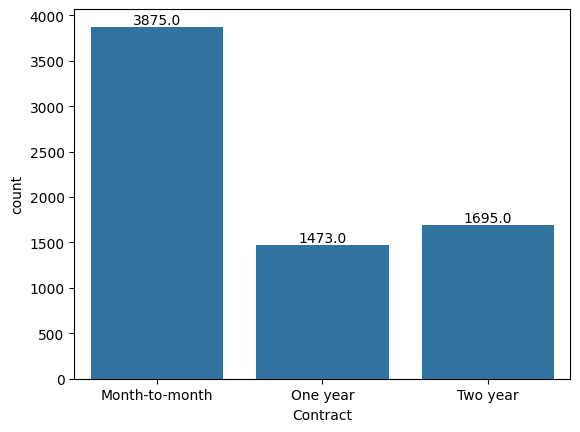

In [ ]:
plot = sns.countplot(x=data['Contract'])

for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), 
                  ha='center', va='bottom')

plt.show()
plt.title('Number of Customers based on Contract')


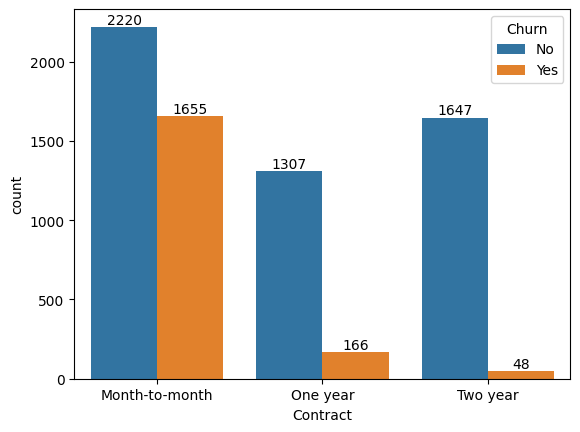

In [ ]:
scplot = sns.countplot(x=data['Contract'], hue=data['Churn'])
for container in scplot.containers:
    scplot.bar_label(container)

plt.show()
#customers churned out based on contract
#people who have month to month contract are likely to churn when compared to one or two year contract

In [46]:
data.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

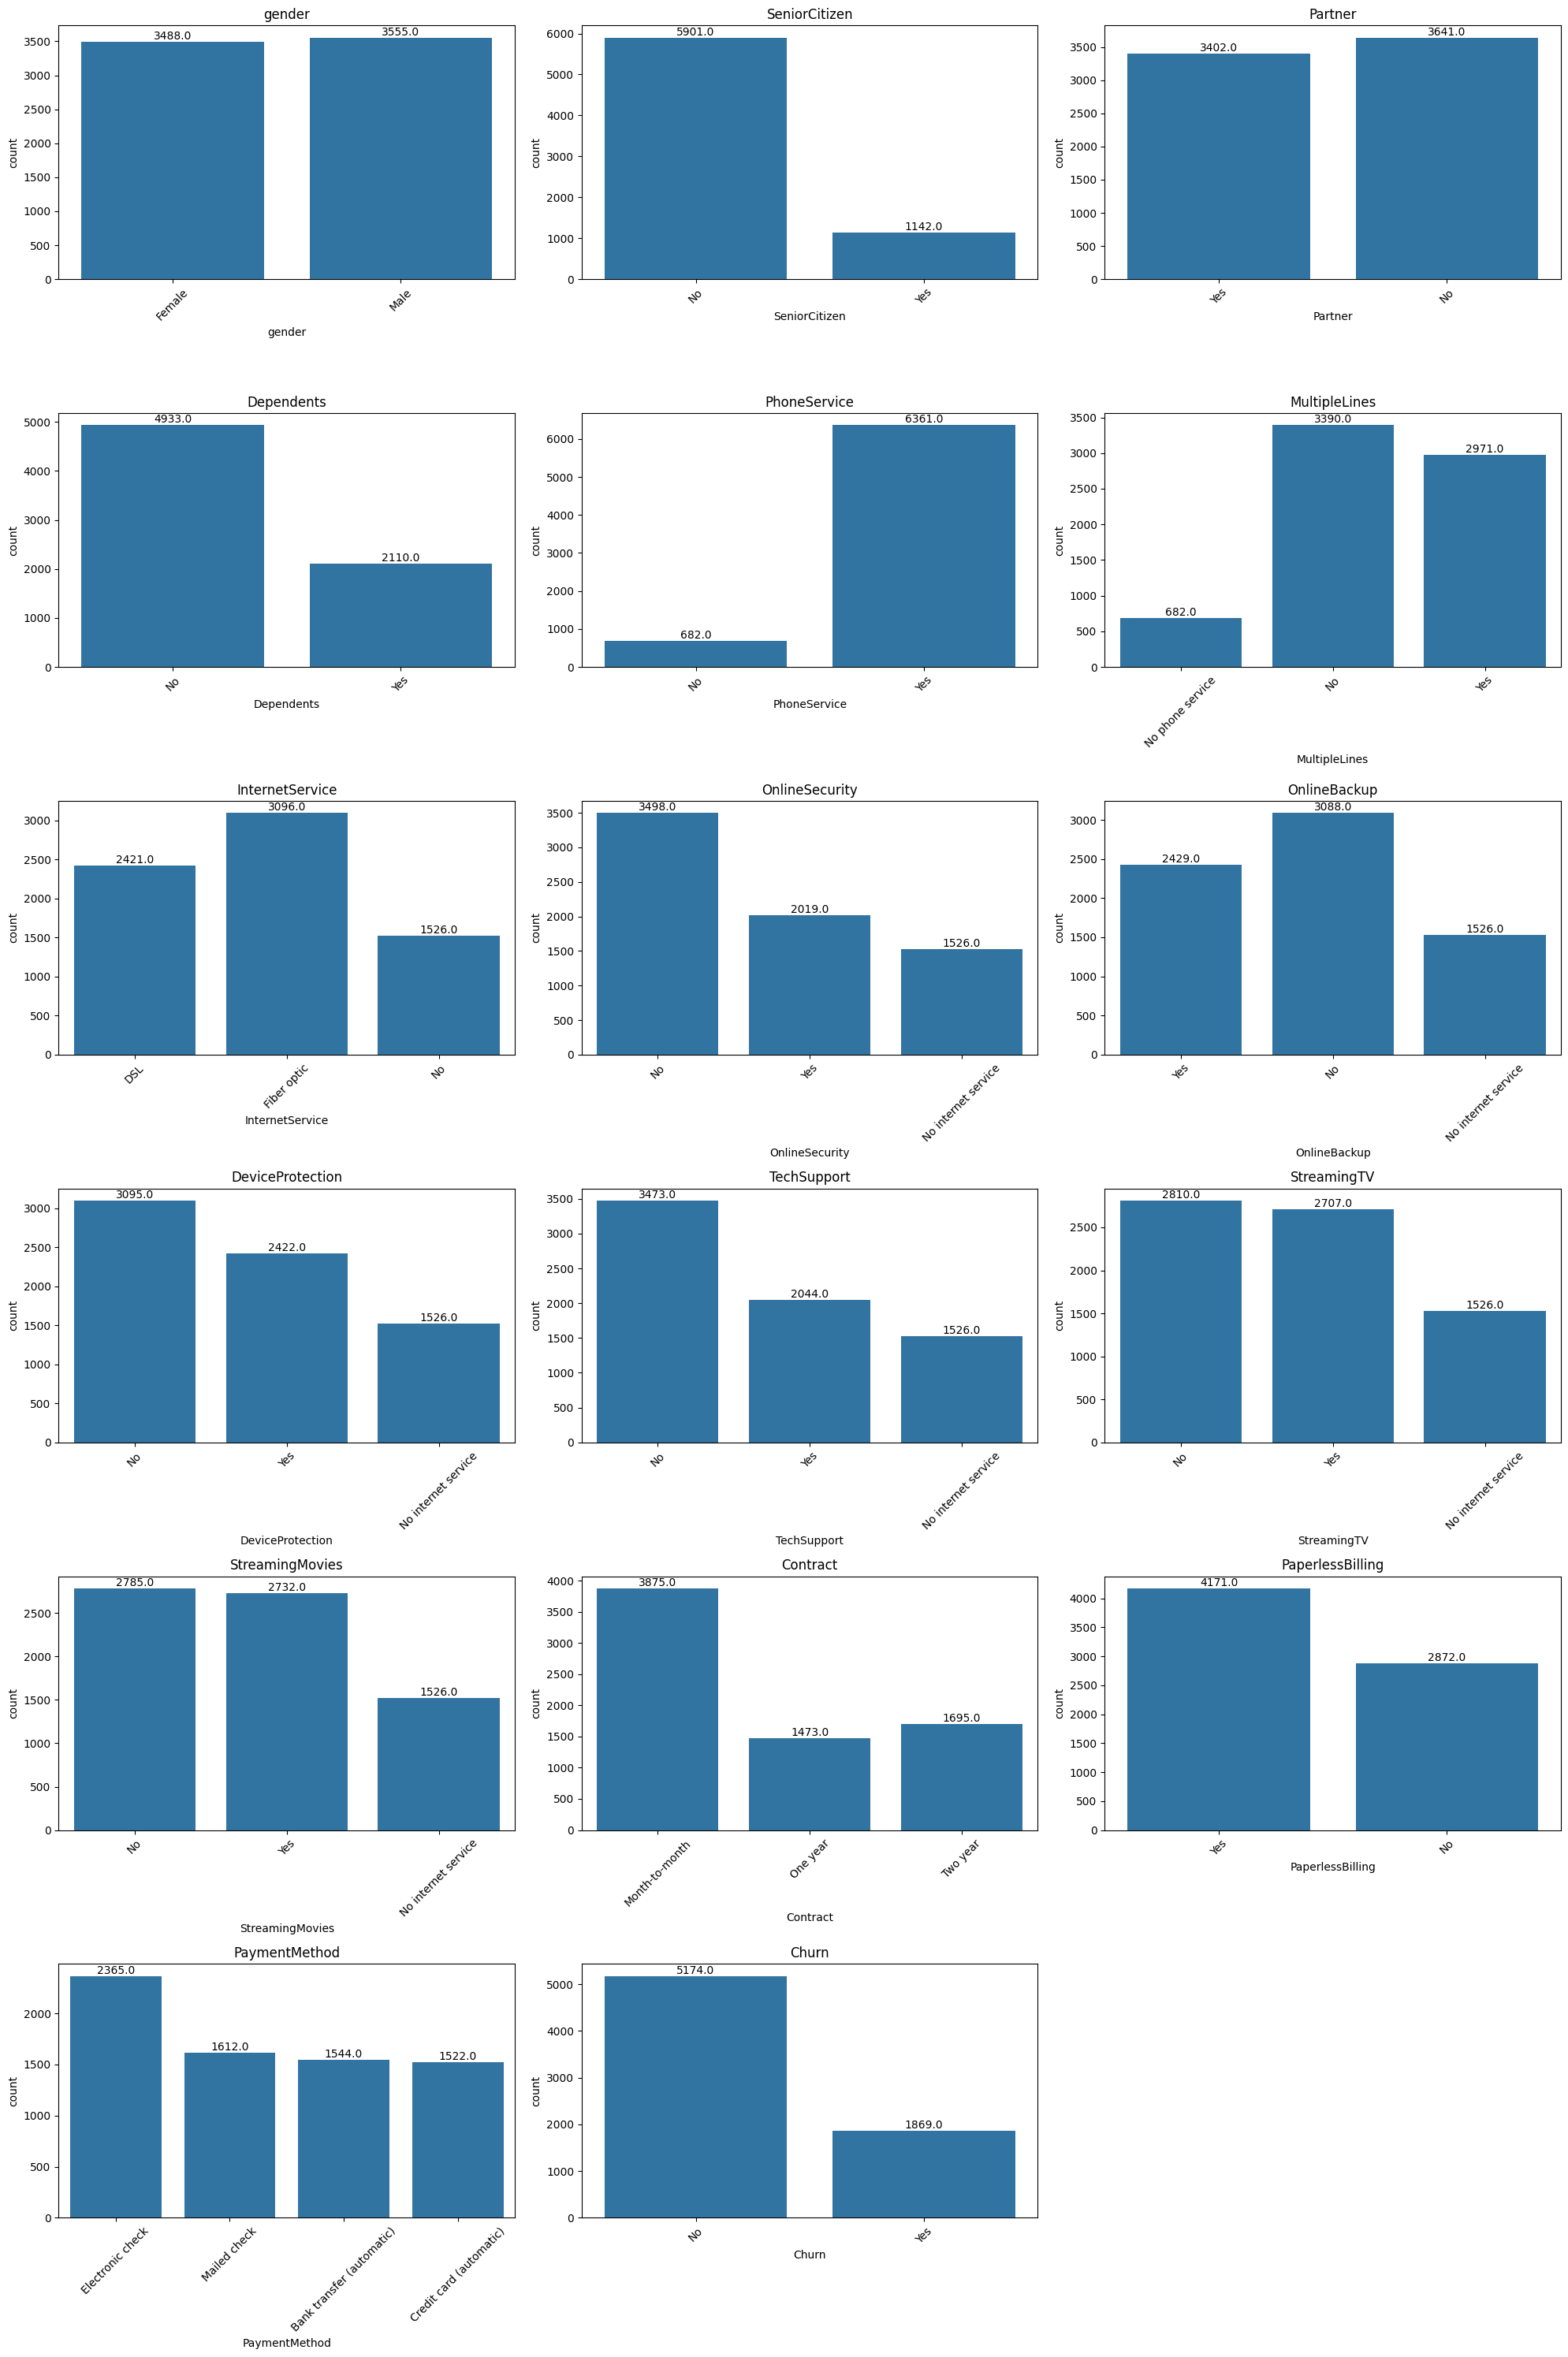

In [49]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'Churn']

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(cols):
    plot = sns.countplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
    for p in plot.patches:
        height = p.get_height()
        plot.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='bottom')

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

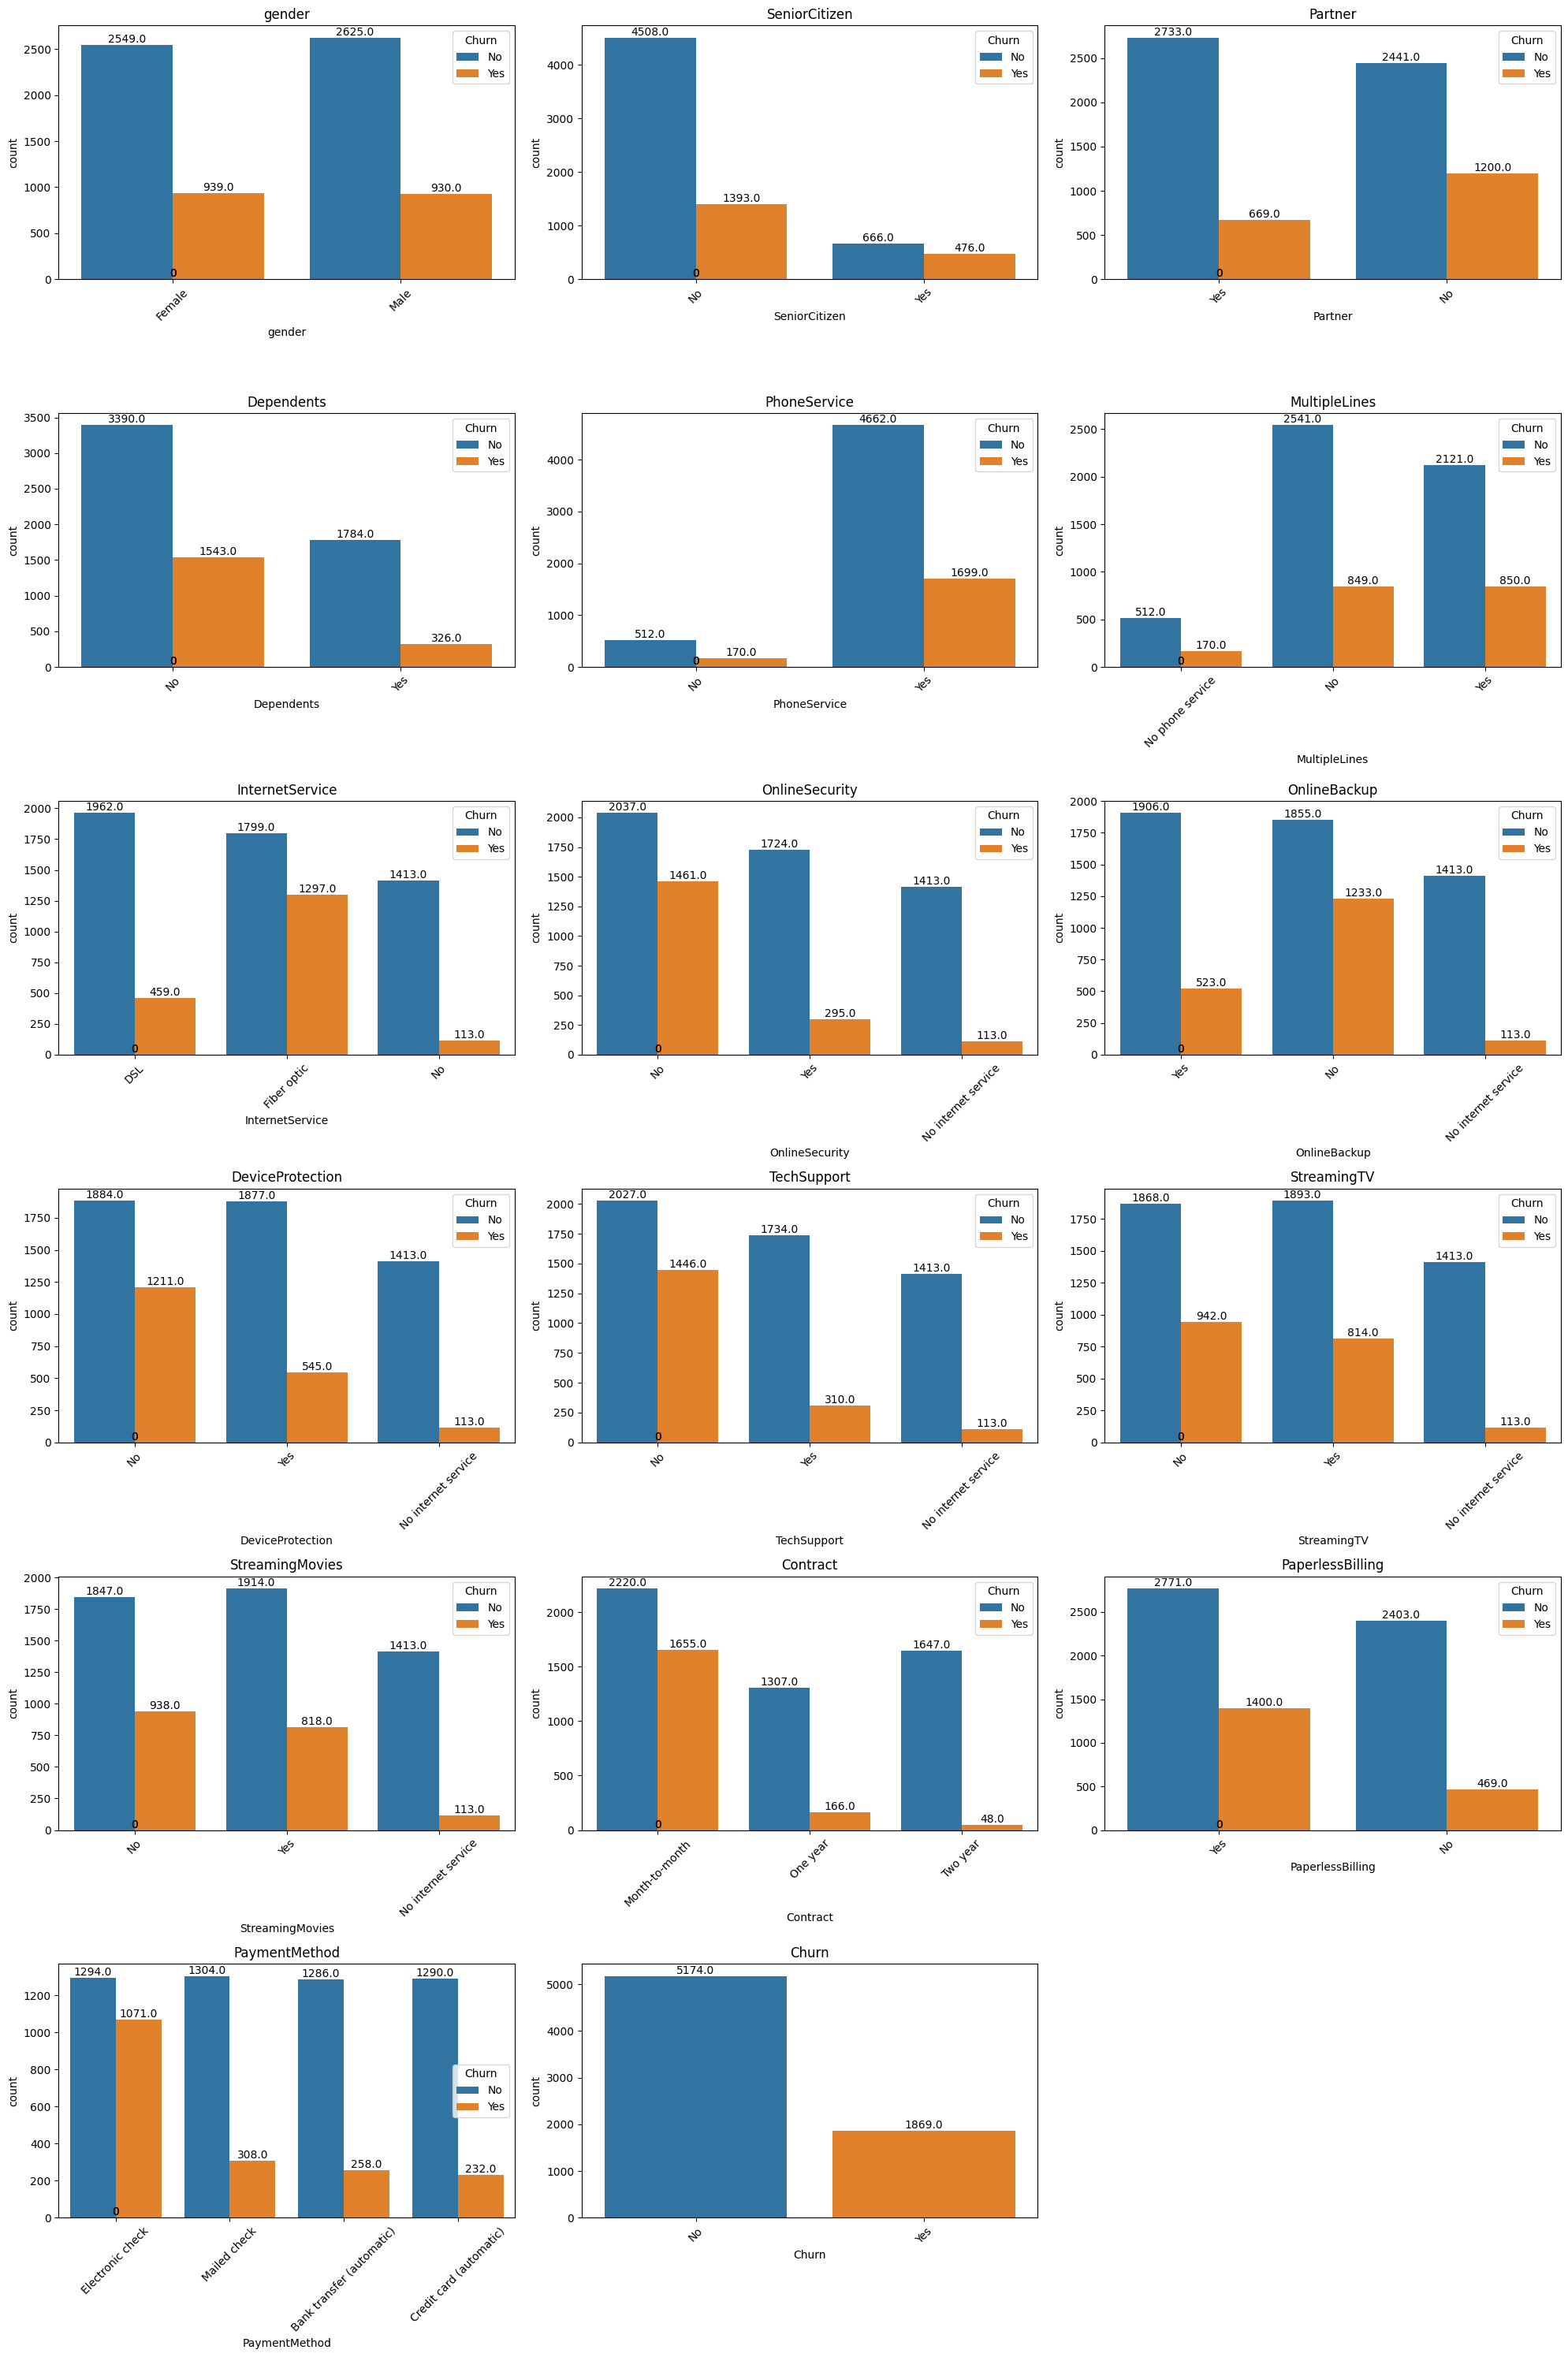

In [51]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'Churn']

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(cols):
    plot = sns.countplot(x=data[col], ax=axes[i],hue=data['Churn'])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
    for p in plot.patches:
        height = p.get_height()
        plot.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='bottom')

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()